Look to see if stations are allways fast or slow

In [1]:
# Environment setup - quite a lot here

# Make pictures show up in the web browser,
# import matplotlib etc, and make the figures
# big
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits.basemap as basemap
plt.rcParams['figure.figsize'] = (12, 8)

# Other "standard" modules
import pandas
import numpy as np

In [2]:
# Read data we have previously saved
paired_picks_df = pandas.read_pickle('processed_data.pkl')

In [3]:
paired_picks_df

,eventid,P_datetime,station_lon,reporter,PcP_datetime,epicentral_distance,station_elev,event_lat,station,backazimuth,...,PcP_P_dtime_resid,azimuth,P_ellip_corr,PcP_ellip_corr,P_tomo_corr,PcP_tomo_corr,P_ttime_corrected,PcP_ttime_corrected,PcP_P_dtime_corrected,PcP_P_dtime_corrected_resid
600130102GTABJI,600130102,2012-01-01 00:38:39.200,99.8144,BJI,2012-01-01 00:40:10.900,47.42,1341.0,11.9775,GTA,313.2,...,1.633292,-46.797752,0.190548,0.251167,-0.029698,-0.650772,512.160850,603.300395,91.139545,1.072836
600130102GYABJI,600130102,2012-01-01 00:37:21.200,106.6640,BJI,2012-01-01 00:39:38.700,37.67,1162.0,11.9775,GYA,297.9,...,0.724390,-62.053108,0.333250,0.496174,0.743488,0.072260,435.076738,572.068434,136.991696,0.216086
600130102KLRIDC,600130102,2012-01-01 00:37:25.400,131.7500,IDC,2012-01-01 00:39:39.170,38.44,298.0,11.9775,KLR,347.4,...,1.066239,-12.607231,-0.025985,-0.008143,-0.246222,-0.263379,437.927793,571.698478,133.770685,1.066924
600130102KSHBJI,600130102,2012-01-01 00:40:50.000,75.9731,BJI,2012-01-01 00:41:23.300,65.33,1314.0,11.9775,KSH,308.0,...,1.446821,-51.901723,0.270470,0.302495,0.819513,0.043098,643.889983,676.445593,32.555610,0.702431
600130102PETKIDC,600130102,2012-01-01 00:38:00.270,157.6989,IDC,2012-01-01 00:39:51.750,42.53,400.0,11.9775,PETK,12.5,...,-0.616608,12.438778,-0.077400,-0.085894,-0.343850,-0.634233,472.648750,583.829873,111.181123,-0.915485
600130102SONMIDC,600130102,2012-01-01 00:38:39.360,106.3950,IDC,2012-01-01 00:40:09.380,47.41,1415.8,11.9775,SONM,326.3,...,-0.089276,-33.652428,0.035502,0.053855,-0.083878,-0.707003,512.111624,601.526852,89.415228,-0.694048
600130102ZALVIDC,600130102,2012-01-01 00:40:26.100,84.8188,IDC,2012-01-01 00:41:05.750,62.28,229.4,11.9775,ZALV,325.1,...,0.187496,-34.807830,-0.035518,-0.037878,-0.483479,-1.061472,618.381003,657.450650,39.069646,-0.392858
600130103AS01NEIC,600130103,2012-01-01 00:56:35.790,133.9510,NEIC,2012-01-01 00:59:19.090,33.03,605.0,-11.3505,AS01,243.9,...,0.509122,-116.127778,0.331128,0.535642,-0.916456,0.067090,390.364672,554.852733,164.488061,1.697183
600130103ASARIDC,600130103,2012-01-01 00:56:36.100,133.9040,IDC,2012-01-01 00:59:19.400,33.07,607.0,-11.3505,ASAR,243.9,...,0.745419,-116.108842,0.331425,0.535699,-0.920397,0.064931,390.671028,555.160631,164.489602,1.935021
600130103STKAIDC,600130103,2012-01-01 00:56:15.400,141.5952,IDC,2012-01-01 00:59:13.370,30.55,272.3,-11.3505,STKA,224.2,...,0.126916,-135.793508,0.207177,0.373697,0.214616,0.176501,370.981793,549.080198,178.098405,0.255321


In [18]:
stations = []
mean = []
std = []
correction = {}

for station in paired_picks_df.station.unique():
    stations.append(station)
    mean.append(paired_picks_df[(paired_picks_df.station==station)].PcP_P_dtime_corrected_resid.mean())
    std.append(paired_picks_df[(paired_picks_df.station==station)].PcP_P_dtime_corrected_resid.std())
    correction[station] = paired_picks_df[(paired_picks_df.station==station)].PcP_P_dtime_corrected_resid.mean()

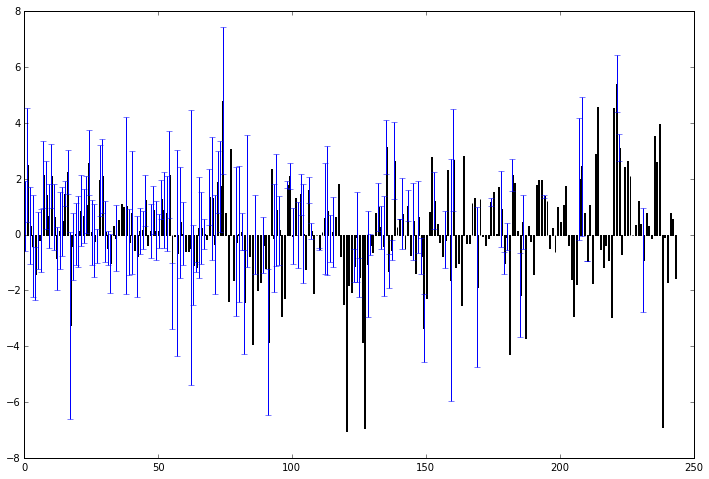

In [19]:
ind = np.arange(len(stations))  # the x locations for the groups
width = 0.35   
fig, ax = plt.subplots()
rects1 = ax.bar(ind, mean, width, color='r', yerr=std)


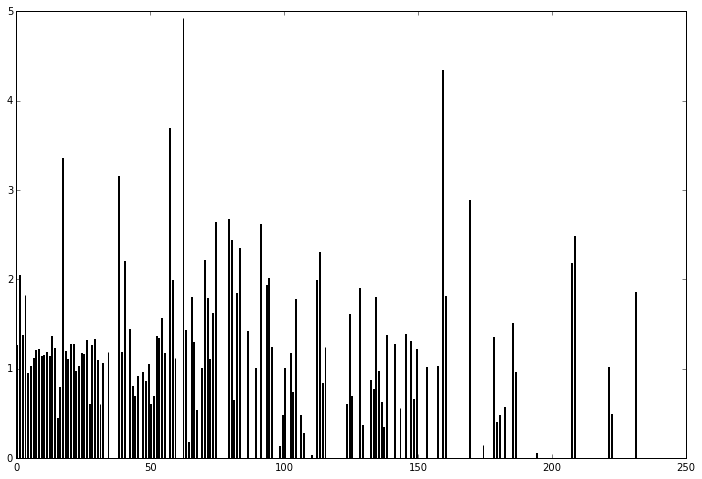

In [20]:
ind = np.arange(len(stations))  # the x locations for the groups
width = 0.35   
fig, ax = plt.subplots()
rects1 = ax.bar(ind, std, width, color='r')

In [21]:
def correct_station(PcP_P_dtime_corrected_resid, station):
    PcP_P_dtime_corrected_station_resid = PcP_P_dtime_corrected_resid - correction[station]
    return PcP_P_dtime_corrected_station_resid

paired_picks_df["PcP_P_dtime_corrected_station_resid"] = paired_picks_df.apply(
    lambda row: correct_station(row['PcP_P_dtime_corrected_resid'], 
                                row['station']), axis=1)




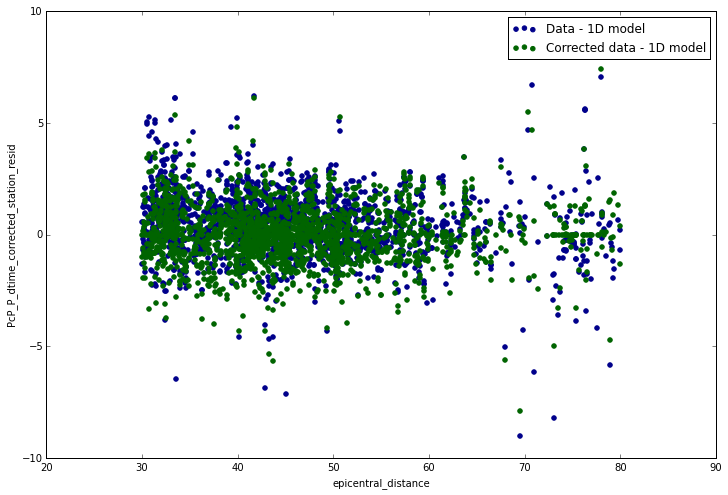

In [22]:
ax = paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_dtime_resid', 
                          color='DarkBlue', label='Data - 1D model')
paired_picks_df.plot(kind='scatter', x='epicentral_distance', y='PcP_P_dtime_corrected_station_resid', 
                          color='DarkGreen', label='Corrected data - 1D model', ax=ax)

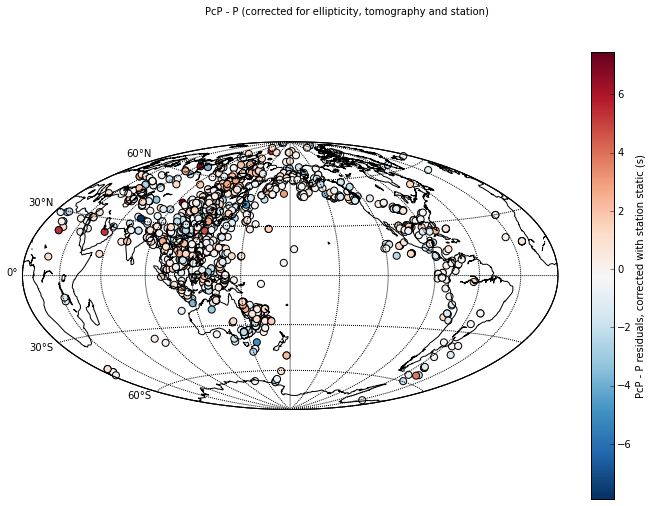

In [23]:
# Plot the residual

fig = plt.figure()
axis = fig.add_subplot(1,1,1)
map = basemap.Basemap(projection='hammer',
                      lat_0=0.0, lon_0=180.0, resolution='c', ax=axis)

map.drawcoastlines()
map.drawmapboundary()
map.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,0])
map.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])

# we need to find the x, y position of the data given
# the map projection.
lonp, latp = map(
    paired_picks_df.CMB_bounce_lon.values, 
    paired_picks_df.CMB_bounce_lat.values)

# plot the data - colour by epicentral distance
sc = map.scatter(lonp, latp, 
                 c=(paired_picks_df.PcP_P_dtime_corrected_station_resid.values), 
                 cmap=plt.cm.RdBu_r, s=50)

cb = plt.colorbar(sc)
cb.ax.set_ylabel('PcP - P residuals, corrected with station static (s)')
fig.suptitle('PcP - P (corrected for ellipticity, tomography and station)')
plt.show()

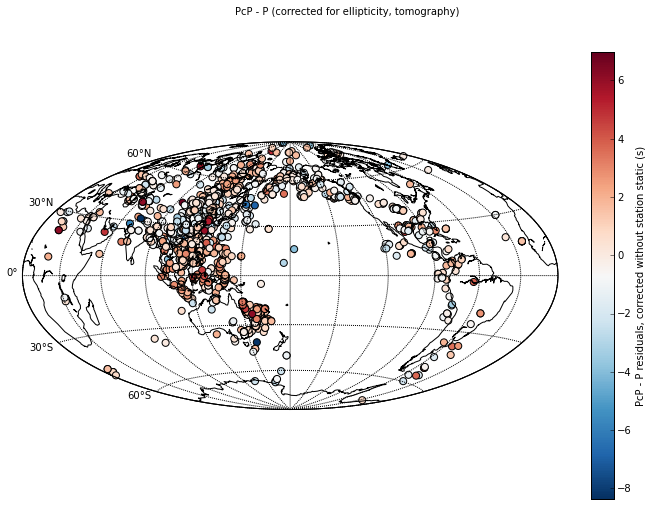

In [26]:
# Plot the residual

fig = plt.figure()
axis = fig.add_subplot(1,1,1)
map = basemap.Basemap(projection='hammer',
                      lat_0=0.0, lon_0=180.0, resolution='c', ax=axis)

map.drawcoastlines()
map.drawmapboundary()
map.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,0])
map.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])

# we need to find the x, y position of the data given
# the map projection.
lonp, latp = map(
    paired_picks_df.CMB_bounce_lon.values, 
    paired_picks_df.CMB_bounce_lat.values)

# plot the data - colour by epicentral distance
sc = map.scatter(lonp, latp, 
                 c=(paired_picks_df.PcP_P_dtime_corrected_resid.values), 
                 cmap=plt.cm.RdBu_r, s=50)

cb = plt.colorbar(sc)
cb.ax.set_ylabel('PcP - P residuals, corrected without station static (s)')
fig.suptitle('PcP - P (corrected for ellipticity, tomography)')
plt.show()

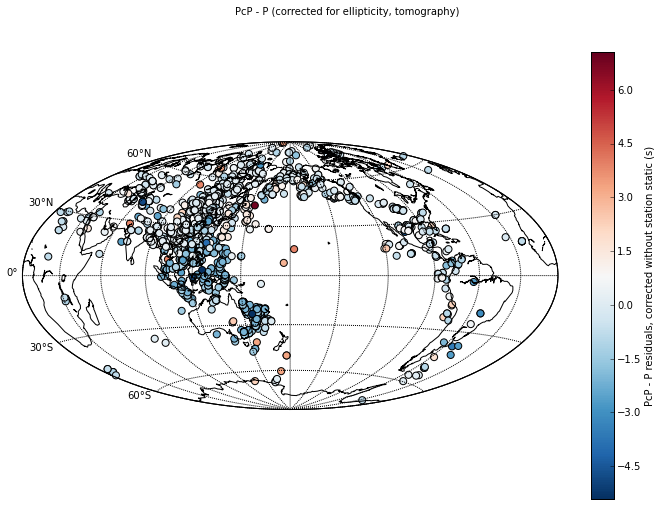

In [29]:
# Plot the residual

fig = plt.figure()
axis = fig.add_subplot(1,1,1)
map = basemap.Basemap(projection='hammer',
                      lat_0=0.0, lon_0=180.0, resolution='c', ax=axis)

map.drawcoastlines()
map.drawmapboundary()
map.drawmeridians(np.arange(-180,180,30), labels=[0,0,0,0])
map.drawparallels(np.arange(-90,90,30), labels=[1,0,0,0])

# we need to find the x, y position of the data given
# the map projection.
lonp, latp = map(
    paired_picks_df.CMB_bounce_lon.values, 
    paired_picks_df.CMB_bounce_lat.values)

# plot the data - colour by epicentral distance
sc = map.scatter(lonp, latp, 
                 c=(paired_picks_df.PcP_P_dtime_corrected_station_resid.values -
                    paired_picks_df.PcP_P_dtime_corrected_resid.values), 
                 cmap=plt.cm.RdBu_r, s=50)

cb = plt.colorbar(sc)
cb.ax.set_ylabel('PcP - P residuals, corrected without station static (s)')
fig.suptitle('PcP - P (corrected for ellipticity, tomography)')
plt.show()

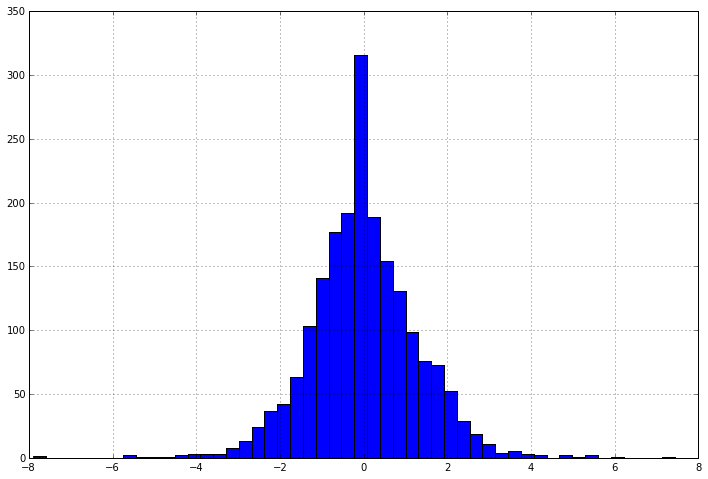

In [31]:
paired_picks_df.PcP_P_dtime_corrected_station_resid.hist(bins=50)

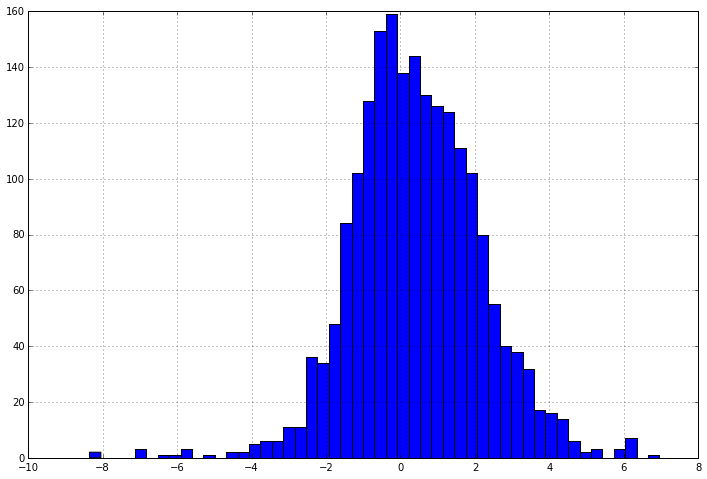

In [30]:
paired_picks_df.PcP_P_dtime_corrected_resid.hist(bins=50)

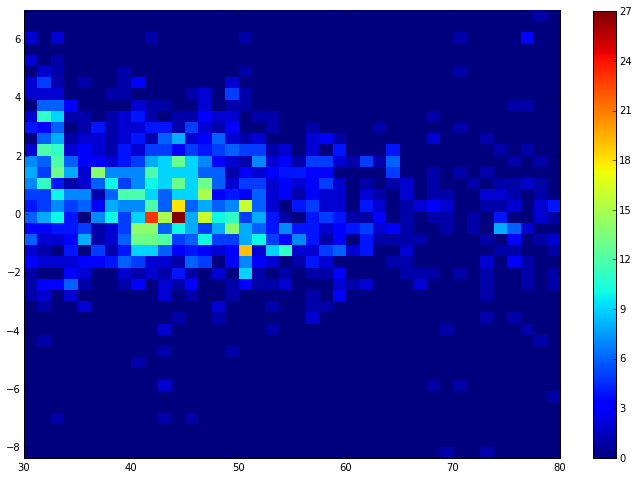

In [27]:
plt.hist2d(paired_picks_df.epicentral_distance.values, 
       paired_picks_df.PcP_P_dtime_corrected_resid.values, 
       bins=40)
plt.colorbar()
plt.show()

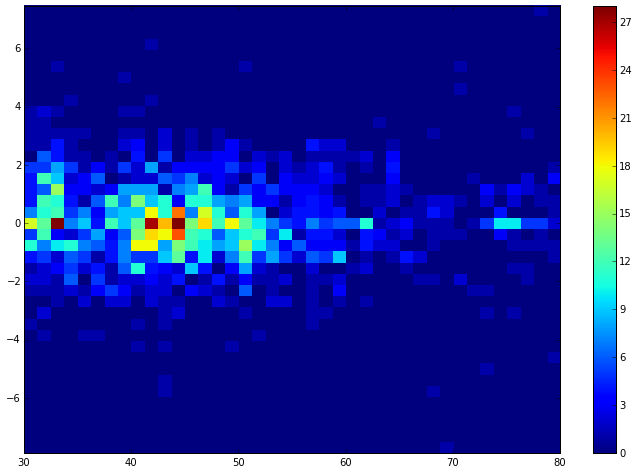

In [28]:
plt.hist2d(paired_picks_df.epicentral_distance.values, 
       paired_picks_df.PcP_P_dtime_corrected_station_resid.values, 
       bins=40)
plt.colorbar()
plt.show()

I'm not convinced this makes it much better. Maybe it does - but how do we know... And anyway - this should go away from PcP - P.

And a per-phase station static term should be the same for P and PcP so should cancel.

## Do we have an epicentral distace dependance on the stats

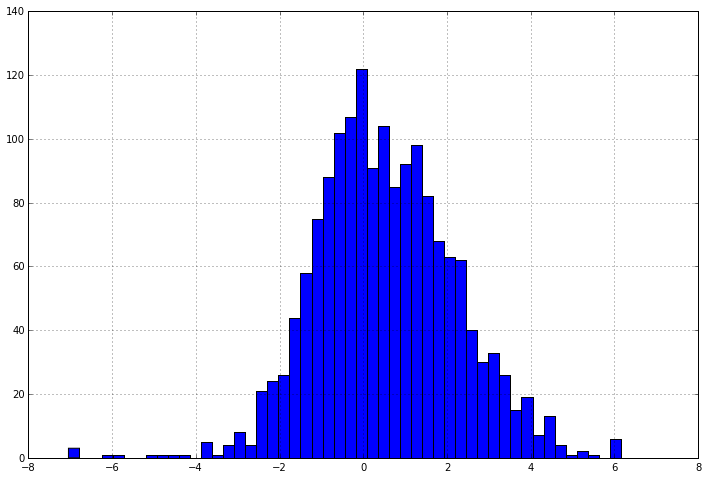

In [32]:
paired_picks_df[(paired_picks_df.epicentral_distance < 55)].PcP_P_dtime_corrected_resid.hist(bins=50)

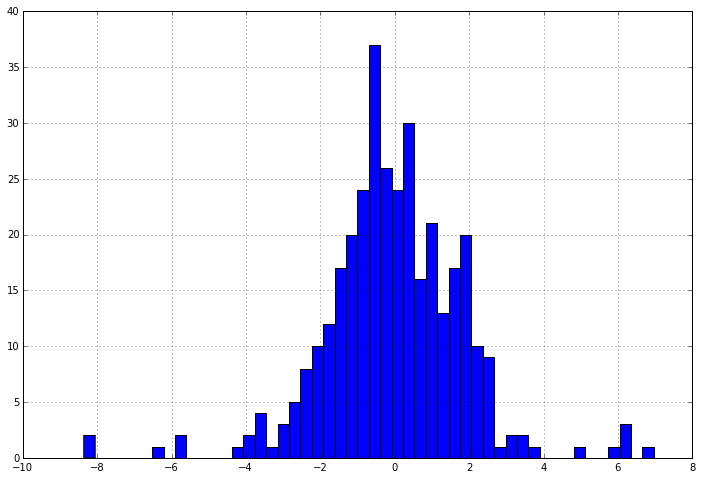

In [33]:
paired_picks_df[(paired_picks_df.epicentral_distance > 55)].PcP_P_dtime_corrected_resid.hist(bins=50)